<a href="https://colab.research.google.com/github/DiscoDoggy/sentiment_analysis_naive_bayes_NLP/blob/main/sentiment_analysis_naive_bayes_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import pandas as pd
from IPython.display import display
import numpy as np
from google.colab import drive
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

drive.mount('/content/drive')

nltk.download('punkt')
nltk.download('wordnet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

###Reading Data In

In [204]:
df_full = pd.read_csv('/content/drive/MyDrive/cs173_emotions_data_set.csv')
df_full = df_full.replace(np.nan, '', regex=True)
display(df_full)

,Sadness Lexicons,Sadness Sentences,Joy Lexicons,Joy Sentences,Fear Lexicons,Fear Sentences,Anger Lexicons,Anger Sentences,Surprise Lexicons,Surprise Sentence,Disgust Lexicons,Disgust Sentences,Sadness + Joy Lexicons,Sadness + Joy Sentences,Fear + Anger Lexicons,Fear + Anger Sentences,Surprise + Disgust Lexicons,Surprise + Disgust Sentences,Sadness + Joy + Fear Lexicons,Sadness + Joy + Fear Sentences
0,"abduction, devastate",The devastating news of the child's abduction ...,"child, laughter, sunny",It was a sunny summer morning and the laughter...,shiver,As he walked in the dead of night he could hea...,reckless,While driving his family to a restaurant a car...,"startle, unexpected",She was startled unexpectedly as everyone spra...,trash,She had forgotten to take out the trash before...,"melancholy, pleasant","When I visited my old childhood home, I felt a...","fearful, harm, provoking, rage",Tom was fearful of his bully and remained doci...,"revolting, shock",He opened the package of his food delivery and...,"anxious, proud, sorrowful",The parents watched their son leave for colleg...
1,"wretched, wrongly",The wretched people have chosen wrongly.,"youth, zeal",The youth are filled with zeal.,"abandoned, yell, youth",The abandoned youth could be heard yelling.,"abolish, wrongful",We must abolish it for its wrongful acts.,yelp,He let out a yelp when his friend jumped out f...,abhorrent,The mysterious slime emitted an abhorrent smell.,"abysmal, advance","They have advanced to the next round, despite ...","animosity, agitation",His animosity was made worse by the repeated\...,"bewildered, appalling",She was bewildered by their appalling behavior.,"apologize, admirable, aggression, afraid",After seeing the group’s admirable performance...
2,"Stifle, Mausoleum","She was not fond of graveyards, let alone the\...","Fidelity, Praiseworthy",Ms. Smith taught the lesson to fidelity. The o...,"\r\nAbyss, Cripple","Leaning over the edge, I peered into the abyss...","Mock, Violence",Your actions make a mockery of ethics! I must ...,"Jolt, Shatter",The sound of my alarms jolts me awake. It shat...,"Unnatural, Plague, Grotesque","His illness left his skin unnatural, like plas...","Winning, Closure","Despite finally winning, I feel robbed of clos...","Abomination, Monstrosity, Affront","What you have created is an abomination, a bon...","Rave, Betray, Dreadfully",Enough of your dreadful raving... Did you forg...,"Endless, Destination, Retirement, Weight",So begins an endless journey with no destinati...
3,"abandon,abandoned,abandonment,abduction,aborti...",I’m feeling very anxious about going back to w...,"absolution, abundance,abundant,accolade,accomp...",The women’s soccer team was proud that they ac...,"abandon,abandoned,abandonment,abduction,abhor,...",I’m afraid we might get trapped in the cave si...,"abandoned,abandonment,abhor,abhorrent,abolish,...","After getting yelled at for 30 minutes, Sam be...","underestimate,undiscovered,unexpected,unexpect...",I underestimated how urgent the call was.,"aberration,abhor,abhorrent,abject,abnormal,abo...",I can’t believe how wasteful the food industry...,"true,twinkle,unbeaten,unconstrained,undying,un...",Although my heart aches because I will never b...,"vermin,versus,veto,vicious,victim,victimized,v...",I hate Tony for wrongfully accusing me of stea...,"underestimate,undiscovered,unexpected,unexpect...",When we looked under the couch we found the un...,"wail,wallow,wan,wane,wanting,warfare,warp,wast...",She starts to weep because she knows that I mi...
4,lonely,Sometimes I feel like something is wrong with ...,"engaged, rekindle",It's crazy to see that Jane and Mike were able...,"onfined, tumor, scare",Ever since the doctors found a tumor in Jessie...,"grudge, incompetent",I cannot believe that you’re still holding a g...,"celebrity, aspiration",It’s always been an aspiration of mine to be a...,nasty,I think it’s so nasty that he’s a grown man an...,"tough, closure, glad",It must have been tough 

###Tokenization
Pre-processed through setting whole string to lower case, tokenizing by word, and removing punctuation

In [205]:
#gets all column names as a list
def get_column_names(df):
  column_names = list(df.columns.values.tolist())
  return column_names

#returns all columns that contain sentences in a list
def get_sentence_column_names(col_names):
  sentence_col_names = []
  for i in range(len(col_names)):
    if i % 2 == 1:
      sentence_col_names.append(col_names[i])

  return sentence_col_names

#returns a data frame containing only sentence columns
def get_only_sentence_columns(df, sentence_col_names):
  sentence_columns = pd.DataFrame()

  for i in range(len(sentence_col_names)):
    sentence_columns[sentence_col_names[i]] = df[sentence_col_names[i]]
  
  return sentence_columns

#helper function that tokenizes a sentence and is used by tokenize_sentences
def tokenize_sentences_helper(sentence):
  sentence = sentence.lower()
  tokenizer = RegexpTokenizer(r'[^.,"\(\)\s]+')
  tokenized_sentence = tokenizer.tokenize(sentence)
  
  lemmatizer = WordNetLemmatizer()

  for i in range(len(tokenized_sentence)):
    tokenized_sentence[i] = lemmatizer.lemmatize(tokenized_sentence[i])

  return tokenized_sentence

#tokenizes all cells of a data frame containing only sentences
def tokenize_sentences(sentences_df, col_names):
  for col in col_names:
    sentences_df[col] = sentences_df[col].apply(tokenize_sentences_helper)
  
  return sentences_df

column_names = get_column_names(df_full)
sentence_col_names = get_sentence_column_names(column_names)
all_sentences = get_only_sentence_columns(df_full,sentence_col_names)

tokenized_sentences_df = tokenize_sentences(all_sentences, sentence_col_names)
display(tokenized_sentences_df)

  

,Sadness Sentences,Joy Sentences,Fear Sentences,Anger Sentences,Surprise Sentence,Disgust Sentences,Sadness + Joy Sentences,Fear + Anger Sentences,Surprise + Disgust Sentences,Sadness + Joy + Fear Sentences
0,"[the, devastating, news, of, the, child's, abd...","[it, wa, a, sunny, summer, morning, and, the, ...","[a, he, walked, in, the, dead, of, night, he, ...","[while, driving, his, family, to, a, restauran...","[she, wa, startled, unexpectedly, a, everyone,...","[she, had, forgotten, to, take, out, the, tras...","[when, i, visited, my, old, childhood, home, i...","[tom, wa, fearful, of, his, bully, and, remain...","[he, opened, the, package, of, his, food, deli...","[the, parent, watched, their, son, leave, for,..."
1,"[the, wretched, people, have, chosen, wrongly]","[the, youth, are, filled, with, zeal]","[the, abandoned, youth, could, be, heard, yell...","[we, must, abolish, it, for, it, wrongful, act]","[he, let, out, a, yelp, when, his, friend, jum...","[the, mysterious, slime, emitted, an, abhorren...","[they, have, advanced, to, the, next, round, d...","[his, animosity, wa, made, worse, by, the, rep...","[she, wa, bewildered, by, their, appalling, be...","[after, seeing, the, group’s, admirable, perfo..."
2,"[she, wa, not, fond, of, graveyard, let, alone...","[m, smith, taught, the, lesson, to, fidelity, ...","[leaning, over, the, edge, i, peered, into, th...","[your, action, make, a, mockery, of, ethics!, ...","[the, sound, of, my, alarm, jolt, me, awake, i...","[his, illness, left, his, skin, unnatural, lik...","[despite, finally, winning, i, feel, robbed, o...","[what, you, have, created, is, an, abomination...","[enough, of, your, dreadful, raving, did, you,...","[so, begin, an, endless, journey, with, no, de..."
3,"[i’m, feeling, very, anxious, about, going, ba...","[the, women’s, soccer, team, wa, proud, that, ...","[i’m, afraid, we, might, get, trapped, in, the...","[after, getting, yelled, at, for, 30, minute, ...","[i, underestimated, how, urgent, the, call, wa]","[i, can’t, believe, how, wasteful, the, food, ...","[although, my, heart, ache, because, i, will, ...","[i, hate, tony, for, wrongfully, accusing, me,...","[when, we, looked, under, the, couch, we, foun...","[she, start, to, weep, because, she, know, tha..."
4,"[sometimes, i, feel, like, something, is, wron...","[it's, crazy, to, see, that, jane, and, mike, ...","[ever, since, the, doctor, found, a, tumor, in...","[i, cannot, believe, that, you’re, still, hold...","[it’s, always, been, an, aspiration, of, mine,...","[i, think, it’s, so, nasty, that, he’s, a, gro...","[it, must, have, been, tough, to, find, out, a...","[it’s, insane, how, daniel, wa, able, to, act,...","[it’s, concerning, how, pearson, isn’t, in, mu...","[it, really, make, you, wonder, what, people, ..."
5,"[the, abandoned, child, looked, up, with, sad,...","[the, clerk, asked, the, child, for, a, small,...","[the, unnerving, noise, and, echo, coming, fro...","[the, child’s, outburst, left, everyone, shock...","[my, heart, beat, with, joy, when, i, unexpect...","[the, awful, smell, coming, from, the, animal,...","[the, survivor, of, the, holocaust, carry, wit...","[when, the, officer, pulled, him, over, he, kn...","[i, felt, appalled, and, ashamed, when, there,...","[i, regret, not, taking, the, job, opportunity..."
6,"[the, death, of, her, dog, left, her, in, deep...","[after, month, of, hard, work, the, team, wa, ...","[he, wa, afraid, of, height, and, refused, to,...","[she, wa, so, angry, when, she, found, out, th...","[the, unexpected, twist, at, the, end, of, the...","[the, smell, of, rotten, food, wa, so, unpleas...","[although, he, wa, deeply, ashamed, of, his, p...","[watching, the, opponent, score, the, tying, p...","[the, awful, smell, from, the, dumpster, wa, a...","[the, delightful, secluded, garden, made, her,..."
7,"[a, my, hand, left, the, piece, i, felt, crush...","[i, delighted, in, the, unconstrained, serenit...","[all, hope, disappears, a, they, look, aghast,...",

###Splitting Data into Train, Test, Validation

In [206]:
training_data = tokenized_sentences_df.iloc[:30]
valid_data = tokenized_sentences_df.iloc[30:40]
test_data = tokenized_sentences_df.iloc[40:]

print("TRAININ DATA")
# print(training_data)
display(training_data)

print("\n\nVALIDATION DATA\n\n")
# print(valid_data)
display(valid_data)

print("\n\nTEST DATA\n\n")
# print(test_data)
display(test_data)

TRAININ DATA


,Sadness Sentences,Joy Sentences,Fear Sentences,Anger Sentences,Surprise Sentence,Disgust Sentences,Sadness + Joy Sentences,Fear + Anger Sentences,Surprise + Disgust Sentences,Sadness + Joy + Fear Sentences
0,"[the, devastating, news, of, the, child's, abd...","[it, wa, a, sunny, summer, morning, and, the, ...","[a, he, walked, in, the, dead, of, night, he, ...","[while, driving, his, family, to, a, restauran...","[she, wa, startled, unexpectedly, a, everyone,...","[she, had, forgotten, to, take, out, the, tras...","[when, i, visited, my, old, childhood, home, i...","[tom, wa, fearful, of, his, bully, and, remain...","[he, opened, the, package, of, his, food, deli...","[the, parent, watched, their, son, leave, for,..."
1,"[the, wretched, people, have, chosen, wrongly]","[the, youth, are, filled, with, zeal]","[the, abandoned, youth, could, be, heard, yell...","[we, must, abolish, it, for, it, wrongful, act]","[he, let, out, a, yelp, when, his, friend, jum...","[the, mysterious, slime, emitted, an, abhorren...","[they, have, advanced, to, the, next, round, d...","[his, animosity, wa, made, worse, by, the, rep...","[she, wa, bewildered, by, their, appalling, be...","[after, seeing, the, group’s, admirable, perfo..."
2,"[she, wa, not, fond, of, graveyard, let, alone...","[m, smith, taught, the, lesson, to, fidelity, ...","[leaning, over, the, edge, i, peered, into, th...","[your, action, make, a, mockery, of, ethics!, ...","[the, sound, of, my, alarm, jolt, me, awake, i...","[his, illness, left, his, skin, unnatural, lik...","[despite, finally, winning, i, feel, robbed, o...","[what, you, have, created, is, an, abomination...","[enough, of, your, dreadful, raving, did, you,...","[so, begin, an, endless, journey, with, no, de..."
3,"[i’m, feeling, very, anxious, about, going, ba...","[the, women’s, soccer, team, wa, proud, that, ...","[i’m, afraid, we, might, get, trapped, in, the...","[after, getting, yelled, at, for, 30, minute, ...","[i, underestimated, how, urgent, the, call, wa]","[i, can’t, believe, how, wasteful, the, food, ...","[although, my, heart, ache, because, i, will, ...","[i, hate, tony, for, wrongfully, accusing, me,...","[when, we, looked, under, the, couch, we, foun...","[she, start, to, weep, because, she, know, tha..."
4,"[sometimes, i, feel, like, something, is, wron...","[it's, crazy, to, see, that, jane, and, mike, ...","[ever, since, the, doctor, found, a, tumor, in...","[i, cannot, believe, that, you’re, still, hold...","[it’s, always, been, an, aspiration, of, mine,...","[i, think, it’s, so, nasty, that, he’s, a, gro...","[it, must, have, been, tough, to, find, out, a...","[it’s, insane, how, daniel, wa, able, to, act,...","[it’s, concerning, how, pearson, isn’t, in, mu...","[it, really, make, you, wonder, what, people, ..."
5,"[the, abandoned, child, looked, up, with, sad,...","[the, clerk, asked, the, child, for, a, small,...","[the, unnerving, noise, and, echo, coming, fro...","[the, child’s, outburst, left, everyone, shock...","[my, heart, beat, with, joy, when, i, unexpect...","[the, awful, smell, coming, from, the, animal,...","[the, survivor, of, the, holocaust, carry, wit...","[when, the, officer, pulled, him, over, he, kn...","[i, felt, appalled, and, ashamed, when, there,...","[i, regret, not, taking, the, job, opportunity..."
6,"[the, death, of, her, dog, left, her, in, deep...","[after, month, of, hard, work, the, team, wa, ...","[he, wa, afraid, of, height, and, refused, to,...","[she, wa, so, angry, when, she, found, out, th...","[the, unexpected, twist, at, the, end, of, the...","[the, smell, of, rotten, food, wa, so, unpleas...","[although, he, wa, deeply, ashamed, of, his, p...","[watching, the, opponent, score, the, tying, p...","[the, awful, smell, from, the, dumpster, wa, a...","[the, delightful, secluded, garden, made, her,..."
7,"[a, my, hand, left, the, piece, i, felt, crush...","[i, delighted, in, the, unconstrained, serenit...","[all, hope, disappears, a, they, look, aghast,...",



VALIDATION DATA




,Sadness Sentences,Joy Sentences,Fear Sentences,Anger Sentences,Surprise Sentence,Disgust Sentences,Sadness + Joy Sentences,Fear + Anger Sentences,Surprise + Disgust Sentences,Sadness + Joy + Fear Sentences
30,"[the, lonely, and, hungry, puppy, whined, a, h...","[her, heart, melted, in, joy, a, she, watched,...","[she, trembled, in, fear, a, she, stumbled, up...","[he, clenched, his, fist, and, teeth, holding,...","[she, let, out, a, yelp, in, surprise, when, h...","[realizing, the, bread, had, an, abnormal, tex...","[at, a, young, age, she, wa, disowned, and, th...","[molly, had, an, argument, with, her, parent, ...","[sarah, came, back, from, a, month-long, vacat...","[coming, from, a, strict, family, tom’s, paren..."
31,"[whenever, alexa, remembered, how, the, love, ...","[ethan, wa, elated, to, find, out, about, the,...","[russia’s, attempted, conquest, of, ukraine, h...","[when, george, found, out, that, olivia, wa, l...","[michael, wa, astonished, to, see, harper’s, z...","[charlie, wa, revolted, when, he, discovered, ...","[while, liam, wa, despondent, to, see, the, or...","[charlotte’s, terror, of, noah’s, harrowing, d...","[claire, could, not, hide, her, astonishment, ...","[while, jack, could, only, feel, despair, and,..."
32,"[a, i, stared, into, the, lifeless, eye, of, t...","[while, the, horde, of, zombie, began, surroun...","[a, the, thundering, step, from, the, other, s...","[the, scorching, sound, of, the, neighbor, mad...","[i, caught, myself, staggering, my, word, tryi...","[the, neglected, little, girl, wa, kept, in, s...","[the, victim, wa, such, a, suffering, sight, t...","[i, quickly, ran, and, yelled, at, the, horrid...","[the, veracity, of, him, to, even, think, abou...","[i, immediately, volunteered, with, glee, a, s..."
33,"[gas, became, overpriced, during, the, pandemic]","[the, mother, wa, thankful, for, the, gift, fr...","[the, siren, warned, the, resident, of, the, v...","[the, lack, of, whipped, cream, on, the, woman...","[when, i, wa, stabbed, my, appendix, ruptured,...","[the, parent, found, the, vulgar, language, of...","[the, man’s, coworkers, treated, him, to, a, d...","[the, evil, tyrant’s, army, pillaged, the, town]","[the, celebrity, is, under, investigation, for...","[sitting, across, from, his, date, after, the,..."
34,"[the, sickening, realization, finally, dawned,...","[it, wa, finally, match, point, after, a, thre...","[when, i, walked, into, the, dimly, lit, aband...","[“you, really, think, i, would, trust, you, ag...","[ethan, looked, down, in, bewilderment, at, th...","[“no, way, you’re, going, to, drink, that, ”, ...","[tonight, wa, the, night, of, my, big, perform...","[“please, don’t, do, it, you’re, going, to, re...","[leon, my, ex-husband, pitifully, knelt, befor...","[i, looked, across, at, my, brother, jack, for..."
35,"[rohit:, whenever, i, think, about, the, time,...","[rohit:, the, beach, ha, always, been, a, happ...","[rohit:, getting, vaccinated, and, practicing,...","[rohit:, the, protesting, crowd, wa, riled, up...","[rohit:, the, baseball, game, wa, placed, on, ...","[rohit:, the, smell, of, puke, and, from, the,...","[although, she, wa, haunted, by, her, past, wr...","[rohit:, a, he, slammed, the, door, shut, behi...","[i, cringed, at, the, sight, of, the, dismissa...","[rohit:, i, often, time, are, reminded, of, th..."
36,"[the, young, boy, sat, alone, on, the, curb, w...","[after, numerous, interview, and, coding, chal...","[the, man's, heart, raced, a, he, walked, towa...","[the, boy, felt, the, fury, rise, within, him,...","[a, she, walked, into, the, darkened, room, sh...","[the, taste, of, the, rotten, and, moldy, sand...","[a, he, watched, his, daughter, sink, the, win...","[the, room, wa, silent, except, for, the, soun...","[i, heard, a, loud, bang, and, rushed, outside...","[john, wa, over, the, moon, when, he, received..."
37,"[the, sorrowful, expression, upon, the, dying,...","[an, overwhelming, feeling, of, ecstasy, washe...","[his, heart, twitched, wit



TEST DATA




,Sadness Sentences,Joy Sentences,Fear Sentences,Anger Sentences,Surprise Sentence,Disgust Sentences,Sadness + Joy Sentences,Fear + Anger Sentences,Surprise + Disgust Sentences,Sadness + Joy + Fear Sentences
40,"[he, sat, alone, by, the, window, lost, in, a,...","[the, elegant, party, wa, filled, with, exquis...","[the, student’s, hand, shook, nervously, a, sh...","[she, couldn’t, help, but, feel, anger, bubbli...","[the, sudden, deluge, of, rain, caught, everyo...","[the, sight, of, the, massive, anaconda, slith...","[the, artist, felt, a, strange, mix, of, sadne...","[his, fear, of, losing, her, friendship, mixed...","[she, wa, taken, aback, with, surprise, and, d...","[a, the, shepherd, watch, the, young, lamb, es..."
41,"[tim, wa, unlucky, he, had, a, traumatic, expe...","[john, achieved, his, lifelong, goal, of, gett...","[for, the, first, time, ryan, felt, fear, ther...","[herlock, shouted, at, the, prisoner, “32, sta...","[the, sudden, sneeze, from, henry, startled, h...","[that, dastardly, man, went, into, the, house,...","[we, commemorated, the, closure, of, our, stor...","[the, abandonment, of, those, child, are, abho...","[i, saw, the, face, of, those, who, were, atta...","[we, were, about, to, reach, our, final, desti..."
42,"[after, his, wife, left, him, he, lost, his, j...","[the, music, that, wa, playing, in, the, cafe,...","[friday, the, thirteenth, always, elicited, an...","[hearing, the, various, hoax, that, his, frien...","[the, sudden, divorce, paper, from, her, husba...","[the, boy, wa, so, interested, in, rat, that, ...","[the, sonnet, the, man, made, about, his, moth...","[the, hopelessness, that, he, felt, from, his,...","[the, scream, the, girl, let, out, from, the, ...","[the, outburst, from, the, woman, made, all, o..."
43,"[the, news, caused, my, world, to, collapse, l...","[the, moment, i, laid, my, eye, on, the, accep...","[when, the, thought, of, needing, an, abortion...","[filled, with, rage, her, father, stood, up, a...","[her, boyfriend’s, abrupt, breakup, without, a...","[jason, felt, disgusted, and, recoiled, at, th...","[we, felt, melancholic, a, we, watched, the, b...","[walking, down, the, dark, alley, he, noticed,...","[the, first, time, i, drank, alcohol, the, pun...","[link’s, quest, to, save, hyrule, from, calami..."
44,"[he, wa, distraught, by, the, horror, he, saw,...","[pleased, with, her, performance, maggie, wa, ...","[he, felt, an, overwhelming, sense, of, hopele...","[offended, by, his, action, kyle, had, to, res...","[the, wizard, vanished, before, the, child’s, ...","[jayden, thought, he, wa, going, to, vomit, af...","[though, sandra, wa, thrilled, to, be, finally...","[the, man, whimpered, after, violently, gettin...","[mark, spent, hour, trying, to, find, the, roo...","[though, he, wa, rejoicing, that, the, stab, w..."
45,"[grief, i’ve, learned, is, really, just, love,...","[the, pride, of, their, accomplishment, welled...","[the, asylum, wa, supposed, to, be, abandoned,...","[everyday, i, wake, up, and, i, hope, you're, ...","[a, i, whipped, my, head, towards, the, sound,...","[wa, it, not, your, sin, that, trapped, the, u...","[her, heart, brimmed, so, fully, with, hope, a...","[i, stifled, my, cry, and, clamped, my, hand, ...","[the, anticipation, of, sweetness, made, the, ...","[i, worry, that, someday, i’ll, forget, the, l..."
46,"[she, abandoned, me, last, night, after, sayin...","[i, wa, grateful, to, have, met, him, his, you...","[i, didn't, think, much, of, others', comment,...","[i, started, yelling, the, most, abhorrent, th...","[she, yelped, when, she, accidentally, ran, in...","[i, abhor, him, so, much, that, staring, at, h...","[the, abandonment, she, had, went, through, ma...","[he, started, yelling, aggressively, to, fight...","[i, yelped, when, i, wa, suddenly, abducted, i...","[she, yelled, urgently, before, i, wa, able, t..."
47,"[richard, lowered, his, head, in, disbelief, a...","[the, father, looked, at, his, son’s, youthful...","[due, to, the, pouring, 

#Implementing Naive Bayes Classifier

###Implementing Naive Bayes Classifier Priors

In [207]:
def calculate_priors(training_set, sentence_col_names):
  training_set_priors = dict()
  total_sentences = 0
  sanity_check = 0

  for col in sentence_col_names:
    col_values = list(training_set[col])

    for sentence in col_values:
      if len(sentence) != 0:
        
        total_sentences += 1

        if col not in training_set_priors:
          training_set_priors[col] = 1
        else:
          training_set_priors[col] += 1
  
  training_set_priors['Sadness Sentences'] += training_set_priors['Sadness + Joy Sentences']
  training_set_priors['Joy Sentences'] += training_set_priors['Sadness + Joy Sentences']
  total_sentences += training_set_priors['Sadness + Joy Sentences']
  
  training_set_priors['Fear Sentences'] += training_set_priors['Fear + Anger Sentences']
  training_set_priors['Anger Sentences'] += training_set_priors['Fear + Anger Sentences']
  total_sentences += training_set_priors['Fear + Anger Sentences']

  training_set_priors['Surprise Sentence'] += training_set_priors['Surprise + Disgust Sentences']
  training_set_priors['Disgust Sentences'] += training_set_priors['Surprise + Disgust Sentences']
  total_sentences += training_set_priors['Surprise + Disgust Sentences']


  training_set_priors['Sadness Sentences'] += training_set_priors['Sadness + Joy + Fear Sentences']
  training_set_priors['Joy Sentences'] += training_set_priors['Sadness + Joy + Fear Sentences']
  training_set_priors['Fear Sentences'] += training_set_priors['Sadness + Joy + Fear Sentences']
  total_sentences += (training_set_priors['Sadness + Joy + Fear Sentences'] * 2)

  del training_set_priors['Sadness + Joy Sentences']
  del training_set_priors['Fear + Anger Sentences']
  del training_set_priors['Surprise + Disgust Sentences']
  del training_set_priors['Sadness + Joy + Fear Sentences']

  for key in training_set_priors: #fix the more tehan one emotion at a time category
    training_set_priors[key] /= total_sentences
    sanity_check += training_set_priors[key]

  print(sanity_check) #check to see if adding all class probabilities together yields 100%
  print(total_sentences)

  return training_set_priors  
    
training_priors = calculate_priors(training_data, sentence_col_names)
print(training_priors)


1.0
442
{'Sadness Sentences': 0.20135746606334842, 'Joy Sentences': 0.20135746606334842, 'Fear Sentences': 0.20135746606334842, 'Anger Sentences': 0.13574660633484162, 'Surprise Sentence': 0.12895927601809956, 'Disgust Sentences': 0.13122171945701358}


###Naive Bayes Preprocessing


*   Finding number of unique tokens per class
*   Finding vocabulary size
*   Finding out the frequency of a token within its class
*   Aggregating sentences from the multi emotion classes to single emotion
    classes



In [208]:
def calculating_emote_token_freq(training_set, sentence_col_names):
  temp_dict_emote_token_freq = dict()
  map_emote_dict_to_emote_freq_dict = dict()

  for col in sentence_col_names:

    col_sentences = training_set[col]

    for sentence in col_sentences:
      for token in sentence:
      
        if token != "" and token is not None:

          if token in temp_dict_emote_token_freq:
            temp_dict_emote_token_freq[token] += 1

          elif token not in temp_dict_emote_token_freq:
            temp_dict_emote_token_freq[token] = 1

          else:
            continue
    
    
    dict_emote_token_freq = temp_dict_emote_token_freq.copy()
    map_emote_dict_to_emote_freq_dict[col] = dict_emote_token_freq
    temp_dict_emote_token_freq = dict()
  
  return map_emote_dict_to_emote_freq_dict

def aggregate_multi_emote(all_emote_freq):
  temp_dict = all_emote_freq['Sadness + Joy Sentences']

  for key in temp_dict:

    if key in all_emote_freq['Sadness Sentences']:
      all_emote_freq['Sadness Sentences'][key] += temp_dict[key]
    else: 
      all_emote_freq['Sadness Sentences'][key] = temp_dict[key]

    if key in all_emote_freq['Joy Sentences']:
      all_emote_freq['Joy Sentences'][key] += temp_dict[key]
    else:
      all_emote_freq['Joy Sentences'][key] = temp_dict[key]

  temp_dict = all_emote_freq['Fear + Anger Sentences']

  for key in temp_dict:
    if key in all_emote_freq['Fear Sentences']:
      all_emote_freq['Fear Sentences'][key] += temp_dict[key]
    else: 
      all_emote_freq['Fear Sentences'][key] = temp_dict[key]

    if key in all_emote_freq['Anger Sentences']:
      all_emote_freq['Anger Sentences'][key] += temp_dict[key]
    else: 
      all_emote_freq['Anger Sentences'][key] = temp_dict[key]

  temp_dict = all_emote_freq['Surprise + Disgust Sentences']

  for key in temp_dict:
    if key in all_emote_freq['Surprise Sentence']:
      all_emote_freq['Surprise Sentence'][key] += temp_dict[key]
    else: 
      all_emote_freq['Surprise Sentence'][key] = temp_dict[key]

    if key in all_emote_freq['Disgust Sentences']:
      all_emote_freq['Disgust Sentences'][key] += temp_dict[key]
    else: 
      all_emote_freq['Disgust Sentences'][key] = temp_dict[key]

  temp_dict = all_emote_freq['Sadness + Joy + Fear Sentences']

  for key in temp_dict:
    if key in all_emote_freq['Joy Sentences']:
      all_emote_freq['Joy Sentences'][key] += temp_dict[key]
    else: 
      all_emote_freq['Joy Sentences'][key] = temp_dict[key]

    if key in all_emote_freq['Sadness Sentences']:
      all_emote_freq['Sadness Sentences'][key] += temp_dict[key]
    else: 
      all_emote_freq['Sadness Sentences'][key] = temp_dict[key]

    if key in all_emote_freq['Fear Sentences']:
      all_emote_freq['Fear Sentences'][key] += temp_dict[key]
    else: 
      all_emote_freq['Fear Sentences'][key] = temp_dict[key]

  del all_emote_freq['Sadness + Joy Sentences']
  del all_emote_freq['Fear + Anger Sentences']
  del all_emote_freq['Surprise + Disgust Sentences']
  del all_emote_freq['Sadness + Joy + Fear Sentences']

  return all_emote_freq

def calculate_class_num_tokens_and_num_vocab(all_emote_freq):
  dict_seen_vocab = dict()
  dict_num_tokens_in_emote = dict()
  size_vocab = 0

  #all emote freq dictionary mapping emotion to 
  # another dict of word frequencies for that class

  for big_key in all_emote_freq:
    temp_dict = all_emote_freq[big_key]
    dict_num_tokens_in_emote[big_key] = 0

    for token in temp_dict:
      if token not in dict_seen_vocab:
        size_vocab += 1
        dict_seen_vocab[token] = 1
      else:
        dict_seen_vocab[token] += temp_dict[token] - 1

      dict_num_tokens_in_emote[big_key] += all_emote_freq[big_key][token]

  return dict_num_tokens_in_emote, size_vocab, dict_seen_vocab

dict_emotion_token_frequencies = calculating_emote_token_freq(training_data, sentence_col_names)
# print(dict_emotion_token_frequencies)

dict_emotion_token_frequencies = aggregate_multi_emote(dict_emotion_token_frequencies)
# print(dict_emotion_token_frequencies)

num_tokens_per_class, size_vocab, seen_vocab = calculate_class_num_tokens_and_num_vocab(dict_emotion_token_frequencies)
print(num_tokens_per_class)
print(size_vocab)
print(seen_vocab)

{'Sadness Sentences': 2400, 'Joy Sentences': 2530, 'Fear Sentences': 2442, 'Anger Sentences': 1364, 'Surprise Sentence': 1292, 'Disgust Sentences': 1274}
2133
{'the': 635, 'devastating': 1, 'news': 1, 'of': 262, "child's": 1, 'abduction': 1, 'left': 13, 'a': 331, 'solemn': 1, 'shadow': 1, 'over': 10, 'family': 11, 'for': 61, 'next': 1, 'month': 2, 'wretched': 3, 'people': 25, 'have': 31, 'chosen': 1, 'wrongly': 3, 'she': 73, 'wa': 176, 'not': 26, 'fond': 1, 'graveyard': 1, 'let': 2, 'alone': 2, 'mausoleum': 1, 'sudden': 3, 'noise': 1, 'startled': 2, 'her': 69, 'and': 153, 'stifled': 1, 'gasp': 1, 'i’m': 11, 'feeling': 16, 'very': 7, 'anxious': 3, 'about': 8, 'going': 1, 'back': 10, 'to': 189, 'work': 3, 'week': 1, 'after': 24, 'found': 14, 'out': 19, 'that': 95, 'recovering': 1, 'alcoholic': 1, 'they': 40, 'all': 27, 'started': 2, 'treat': 1, 'me': 56, 'differently': 1, 'sometimes': 1, 'i': 220, 'feel': 15, 'like': 4, 'something': 1, 'is': 35, 'wrong': 1, 'with': 89, 'because': 16, 'lo

###Calculating Likelihoods

In [209]:
# def tokenize_sentences_helper(sentence):
#   sentence = sentence.lower()
#   tokenizer = RegexpTokenizer(r'[^.,"\(\)\s]+')
#   tokenized_sentence = tokenizer.tokenize(sentence)

#   return tokenized_sentence

def calculate_likelihoods(str_input, num_tokens_per_class, vocab_size, emote_token_freq, dict_seen_vocab):
  emotion_likelihoods = dict()

  # print(str_input)

  for emote in emote_token_freq:
    emotion_likelihoods[emote] = 1.0

  # tokenized_input = tokenize_sentences_helper(str_input)
  # lemmatizer = WordNetLemmatizer()
  
  # for i in range(len(tokenized_input)):
  #   tokenized_input[i] = lemmatizer.lemmatize(tokenized_input[i])

  for token in str_input:
    if token not in dict_seen_vocab:
      continue

    for emote in emote_token_freq:
      #print(emote_token_freq)
      if token not in emote_token_freq[emote]:
        cnt_token_in_emote = 0
      else:
        cnt_token_in_emote = emote_token_freq[emote][token]

      num_tokens_in_emote = num_tokens_per_class[emote]
      # print('\n',token,'\n')
      # print(cnt_token_in_emote)
      # print(num_tokens_in_emote)
      # print(token)
      # print(tokenized_input)
      
      emotion_likelihoods[emote] *= (cnt_token_in_emote + 1) / (num_tokens_in_emote + vocab_size)

  return emotion_likelihoods


test_string = "As she hugged her daughter goodbye on the first day of college, she felt both sad to see her go and joyful knowing that she was embarking on a new and exciting chapter in her life."
tokenized_input = tokenize_sentences_helper(test_string)
likelihoods = calculate_likelihoods(tokenized_input,num_tokens_per_class, size_vocab,dict_emotion_token_frequencies, seen_vocab)
print(likelihoods)

{'Sadness Sentences': 3.5864764587817268e-75, 'Joy Sentences': 2.7837849365855425e-75, 'Fear Sentences': 1.116020412184898e-76, 'Anger Sentences': 1.8947845737249216e-81, 'Surprise Sentence': 2.1154246517058614e-80, 'Disgust Sentences': 3.008589170772999e-81}


###Calculating Naive Bayes

In [210]:
def calc_naive_bayes(likelihoods, priors, all_class_token_freq, input_str):
  emotion_probs = dict()
  # lemmatizer = WordNetLemmatizer()
  # print(all_class_token_freq)

  # for i in range(len(tokenized_input)):
  #   tokenized_input[i] = lemmatizer.lemmatize(tokenized_input[i])

  # print("rocks: ", lemmatizer.lemmatize("rocks"))
  
  # print(all_class_token_freq)

  for emote in likelihoods:
    emotion_probs[emote] = 1
  
  num_total_tokens = 0
  for key in all_class_token_freq:
    num_total_tokens += all_class_token_freq[key]
  
  # print(num_total_tokens)

  bayes_denom = 1
  for token in input_str:
    if token in all_class_token_freq:
      #print(token)
      bayes_denom *= (all_class_token_freq[token]/num_total_tokens)

  for emote in likelihoods:
    emotion_probs[emote] *= (likelihoods[emote] * priors[emote]) / bayes_denom
  
  return emotion_probs

probabilities = calc_naive_bayes(likelihoods, training_priors, seen_vocab, tokenized_input)
print(probabilities)
print(sum(probabilities.values()))
print("\n\nThe predicted class is", max(probabilities, key = probabilities.get))
print(max(probabilities, key = probabilities.get))

{'Sadness Sentences': 1.161825325873763e-05, 'Joy Sentences': 9.017964785999474e-06, 'Fear Sentences': 3.615305422941305e-07, 'Anger Sentences': 4.138032894180231e-12, 'Surprise Sentence': 4.388895745480127e-11, 'Disgust Sentences': 6.351462371410008e-12}
2.0997802965483952e-05


The predicted class is Sadness Sentences
Sadness Sentences


#Evaluation

In [211]:
def process_testing_data(test_set):
  pass
# del all_emote_freq['Sadness + Joy Sentences']
#   del all_emote_freq['Fear + Anger Sentences']
#   del all_emote_freq['Surprise + Disgust Sentences']
#   del all_emote_freq['Sadness + Joy + Fear Sentences']
def generate_conf_matrix(test_set):
  Y_pred = []
  Y_true = []

  lists_of_sentences = dict()

  for col in test_set:
    sentence_list_per_emote = []

    for sentence in test_set[col]:

      if col != 'Sadness + Joy Sentences' and col != 'Fear + Anger Sentences' and col != 'Surprise + Disgust Sentences' and col != 'Sadness + Joy + Fear Sentences':
        Y_true.append(col)
        sentence_list_per_emote.append(sentence)
          
    sentence_list = sentence_list_per_emote.copy()
    sentence_list_per_emote = []

    if col != 'Sadness + Joy Sentences' and col != 'Fear + Anger Sentences' and col != 'Surprise + Disgust Sentences' and col != 'Sadness + Joy + Fear Sentences':
      lists_of_sentences[col] = sentence_list

  for key in lists_of_sentences:
    # print(key)
    temp_list = lists_of_sentences[key]

    for sentence in temp_list:
      # print(sentence)
      likelihoods = calculate_likelihoods(sentence,num_tokens_per_class, size_vocab,dict_emotion_token_frequencies, seen_vocab)
      emotion_probs = calc_naive_bayes(likelihoods, training_priors,seen_vocab,sentence)

      Y_pred.append(max(emotion_probs, key = emotion_probs.get))
      # print(emotion_probs)

  cf = confusion_matrix(Y_true, Y_pred)
  print(type(Y_pred))
  print(Y_pred)
  print(Y_true)
  print(cf)

  return cf, Y_pred, Y_true


cf, Y_pred, Y_true = generate_conf_matrix(test_data)

<class 'list'>
['Sadness Sentences', 'Fear Sentences', 'Sadness Sentences', 'Sadness Sentences', 'Sadness Sentences', 'Fear Sentences', 'Sadness Sentences', 'Fear Sentences', 'Sadness Sentences', 'Joy Sentences', 'Joy Sentences', 'Joy Sentences', 'Joy Sentences', 'Joy Sentences', 'Joy Sentences', 'Sadness Sentences', 'Joy Sentences', 'Surprise Sentence', 'Sadness Sentences', 'Fear Sentences', 'Joy Sentences', 'Sadness Sentences', 'Fear Sentences', 'Fear Sentences', 'Sadness Sentences', 'Sadness Sentences', 'Fear Sentences', 'Sadness Sentences', 'Fear Sentences', 'Fear Sentences', 'Joy Sentences', 'Fear Sentences', 'Fear Sentences', 'Fear Sentences', 'Joy Sentences', 'Joy Sentences', 'Fear Sentences', 'Sadness Sentences', 'Sadness Sentences', 'Sadness Sentences', 'Joy Sentences', 'Fear Sentences', 'Surprise Sentence', 'Joy Sentences', 'Fear Sentences', 'Joy Sentences', 'Joy Sentences', 'Joy Sentences', 'Disgust Sentences', 'Joy Sentences', 'Fear Sentences', 'Sadness Sentences', 'Disgust

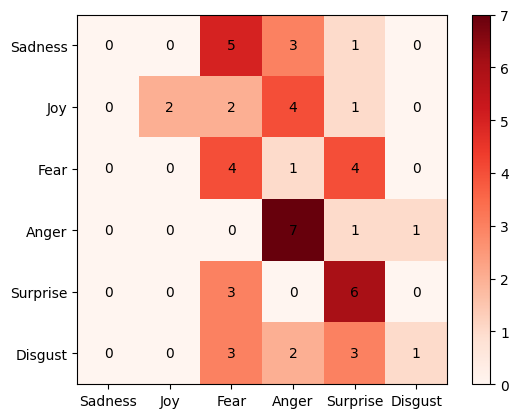

In [212]:
plt.imshow(cf, cmap=plt.cm.Reds)
plt.xticks(np.arange(6), ['Sadness', 'Joy', 'Fear', 'Anger', 'Surprise', 'Disgust'])
plt.yticks(np.arange(6), ['Sadness', 'Joy', 'Fear', 'Anger','Surprise','Disgust'])

for i in range(6):
  for j in range(6):
    plt.text(j,i,str(cf[i][j]), ha = 'center', va = 'center')

plt.colorbar()
plt.show()



###Evaluating using F1, Accuracy, Recall, and Precision

In [213]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for i in range(len(Y_true)):
  if Y_true[i] == "Joy Sentences" and Y_pred[i] == "Joy Sentences":
    true_positive += 1
  if Y_true[i] != "Joy Sentences" and Y_pred[i] != "Joy Sentences":
    true_negative += 1
  if Y_true[i] == "Joy Sentences" and Y_pred[i] != "Joy Sentences":
    false_negative += 1
  if Y_true[i] != "Joy Sentences" and Y_pred[i] == "Joy Sentences":
    false_positive += 1

accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
recall = (true_positive) / (true_positive + false_negative)
precision = (true_positive) / (true_positive + false_positive)

print("Accuracy:",accuracy)
print("Recall:", recall)
print("Precision:",precision)

F1_score = (2 * precision * recall) / (precision + recall)
print("F1 score:", F1_score)



Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.4117647058823529
F1 score: 0.5384615384615384
